# Simulate reaction with signal

### Imports

In [57]:

import logging
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import jax
import jax.numpy as jnp
import diffrax

import bioreaction
from bioreaction.model.data_tools import construct_model
from bioreaction.model.data_containers import QuantifiedReactions
from bioreaction.simulation.simfuncs.basic_de import basic_de_sim
from bioreaction.misc.misc import load_json_as_dict

In [112]:

config = load_json_as_dict('../scripts/playground_signals/simple_config.json')
model = construct_model(config)

qreactions = QuantifiedReactions()
qreactions.init_properties(model, config)

# sim_result = basic_de_sim(qreactions.quantities, qreactions.reactions,
#                           delta_t=config['simulation']['delta_t'], num_steps=config['simulation']['num_steps'])
# Signal
from functools import partial
import diffrax as dfx

def x(t, total_time, dt, step_signal):  # control signal
    return step_signal * t / (total_time / dt)

def step_function(t, total_time_dt):
    return jnp.mod(total_time_dt / 2, t+1) / (total_time_dt / 2)

# exponential decay subject to affine control
def vector_field(t, y, args, x=None):
    # return x(t) #-y + x(t)
    return x(t)

t0, t1, dt0 = 0, 30, 0.1
# signal = partial(x, total_time=t1, dt=dt0, step_signal=4)
signal = partial(step_function, total_time_dt=t1 / dt0)

term = dfx.ODETerm(partial(vector_field, x=signal))
solver = dfx.Tsit5()
saveat = dfx.SaveAt(t0=True, t1=True, steps=True)
sim_result = dfx.diffeqsolve(term, solver, t0=t0, t1=t1, dt0=dt0, y0=1, saveat=saveat)


/home/wadh6511/Kode/env_bioreaction/lib/python3.10/site-packages/diffrax/integrate.py:83: FutureWarning: jax.tree_leaves is deprecated, and will be removed in a future release. Use jax.tree_util.tree_leaves instead.
  [ts, save_index] + jax.tree_leaves(ys),
/home/wadh6511/Kode/env_bioreaction/lib/python3.10/site-packages/diffrax/integrate.py:81: FutureWarning: jax.tree_leaves is deprecated, and will be removed in a future release. Use jax.tree_util.tree_leaves instead.
  lambda s: [s.ts, s.save_index] + jax.tree_leaves(s.ys),


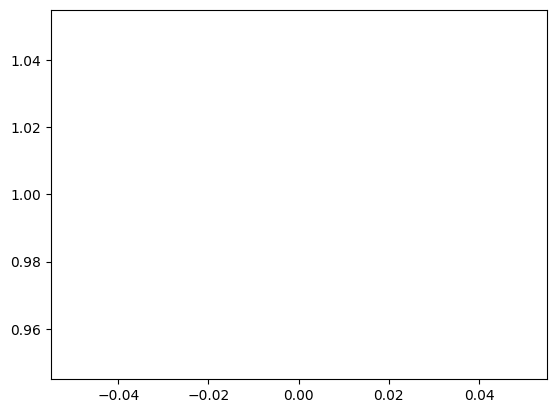

In [113]:
plt.plot(sim_result.ts, sim_result.ys)
plt.show()

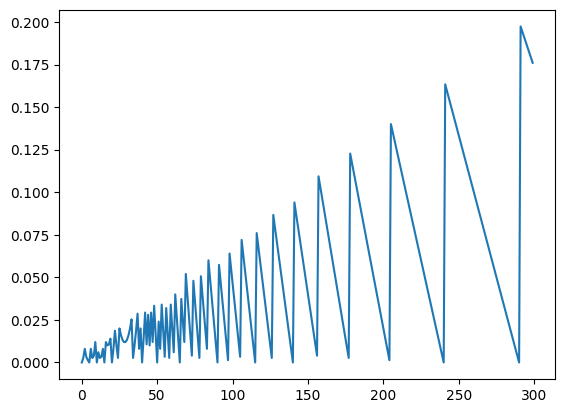

In [94]:
plt.plot([signal(t*dt0) for t in range(int(t0/dt0), int(t1/dt0))])

In [97]:
jnp.mod(2000 / 2, 1500+1) / (2000 / 2)

DeviceArray(1., dtype=float32, weak_type=True)